<a href="https://colab.research.google.com/github/fvergara24/Datathon_FVM/blob/main/FVM_Datathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Descripción del Problema
Nos da la tarea de implementar un modelo que nos permita predecir la cantidad de bicicletas que se alquilan según la información contenida en el dataset puesto a disposición.

##Objetivo
Predecir la cantidad de bicicletas (cnt) que se alquilan 

##LIBRERÍAS

In [150]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import calendar
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## DATOS 

In [120]:
train=pd.read_excel('/content/drive/MyDrive/PI2/bike_train.xlsx')
test=pd.read_excel('/content/drive/MyDrive/PI2/bike_test.xlsx')

## EXPLORACIÓN
Se utiliza el Dataset Train para la exploración 

In [97]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11999 entries, 0 to 11998
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     11999 non-null  int64         
 1   dteday      11999 non-null  datetime64[ns]
 2   season      11999 non-null  int64         
 3   yr          11999 non-null  int64         
 4   mnth        11999 non-null  int64         
 5   hr          11999 non-null  int64         
 6   holiday     11999 non-null  int64         
 7   weekday     11999 non-null  int64         
 8   workingday  11999 non-null  int64         
 9   weathersit  11999 non-null  int64         
 10  temp        11999 non-null  float64       
 11  atemp       11999 non-null  float64       
 12  hum         11999 non-null  float64       
 13  windspeed   11999 non-null  float64       
 14  casual      11999 non-null  int64         
 15  registered  11999 non-null  int64         
 16  cnt         11999 non-

In [ ]:
px.scatter(train, x='dteday',y='cnt').show()

In [ ]:
px.scatter(train, x='season',y='cnt').show()

In [ ]:
px.scatter(train, x='dteday',y='cnt',color='weekday').show()

In [ ]:
train.describe()

In [ ]:
train.groupby(by='weekday').mean()

In [ ]:
train1=train[['season','holiday','weekday','workingday','weathersit','temp','hum','windspeed','cnt']].copy()
px.scatter_matrix(train1).update_layout( width=900, height=1100).show()

In [ ]:
px.scatter(train,x='temp',y='cnt')

Notemos que hay una tendencia lineal con la temperatura hasta el máximo y después una tendendcia negativa

In [ ]:
px.scatter(train,x='windspeed',y='cnt')

In [22]:
train.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

Regresión lineal entre las fechas y el número de bicicletas

In [83]:
type(train['dteday'][0])

numpy.int64

In [108]:
train['dteday']=train['dteday'].map(dt.datetime.toordinal)

In [84]:
train.head(2)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,734138,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,734138,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40


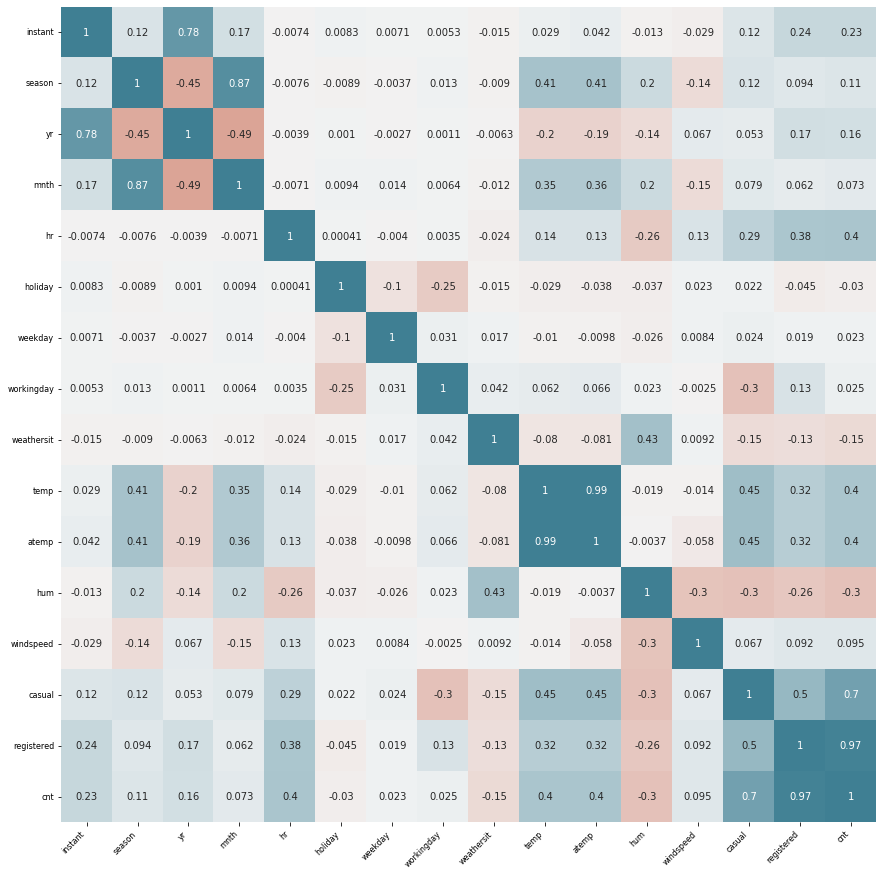

In [151]:
corr_matrix = train.select_dtypes(include=['float64', 'int']).corr(method='pearson')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 10},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 8)

Construyamos el modelo de Machine Learning. 
Utilizaré Regresión Lineal ya que la tendencia entre las fechas y el número de bicicletas es lineal.

Coeficiente [0.23910917] Intersección -175441.1783611522


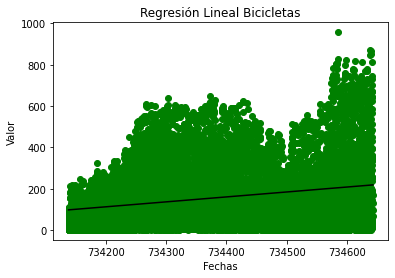

In [109]:
x=train['dteday']
x=np.array(x)
y=train['cnt']
model = LinearRegression(fit_intercept=True)
X = x.reshape(-1,1)
model.fit(X,y)
y_fit=model.predict(X)
print('Coeficiente', model.coef_, 'Intersección', model.intercept_)

# 
plt.figure()
plt.scatter(x,y,color='Green')
plt.plot(X,y_fit, color='Black')
plt.title('Regresión Lineal Bicicletas')
plt.ylabel('Valor')
plt.xlabel('Fechas')
plt.show()

In [132]:
x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=7)
lr=LinearRegression(fit_intercept=True)
lr.fit(x_train,y_train)
y_train_pred=lr.predict(x_train)
y_test_pred=lr.predict(x_test)
print('RMSE Datos Entrenados',mean_squared_error(y_train,y_train_pred, squared=False))
print('RMSE Datos de Prueba',mean_squared_error(y_test,y_test_pred, squared=False))


RMSE Datos Entrenados 147.87828180588312
RMSE Datos de Prueba 145.23452629957762


Utilizando el Dataset TEST

In [ ]:
test['dteday']=test['dteday'].map(dt.datetime.toordinal)

In [148]:
X_test=np.array(test['dteday']).reshape(-1,1)
y_test_pred=model.predict(X_test)

Creando el archivo csv para entrega 

In [129]:
entrega=pd.DataFrame(y_test_pred)
entrega.columns=['pred']
entrega.pred=entrega.pred.astype('int')
entrega.loc[entrega['pred']<0, 'pred']=0
entrega.to_csv('fvergara24.csv',index=False)

Regresión lineal con Temperatura

Coeficiente [317.71050067] Intersección 10.635976035071991
MSE Datos Entrenados 138.88453463866833
MSE Datos de Prueba 139.6275653821605


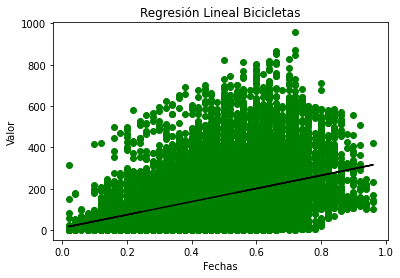

In [152]:
x=train['temp']
x=np.array(x)
y=train['cnt']
model = LinearRegression(fit_intercept=True)
X = x.reshape(-1,1)
model.fit(X,y)
y_fit=model.predict(X)
x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=7)
lr=LinearRegression(fit_intercept=True)
lr.fit(x_train,y_train)
y_train_pred=lr.predict(x_train)
y_test_pred=lr.predict(x_test)
print('Coeficiente', model.coef_, 'Intersección', model.intercept_)
print('MSE Datos Entrenados',mean_squared_error(y_train,y_train_pred, squared=False))
print('MSE Datos de Prueba',mean_squared_error(y_test,y_test_pred, squared=False))
plt.figure()
plt.scatter(x,y,color='Green')
plt.plot(X,y_fit, color='Black')
plt.title('Regresión Lineal Bicicletas')
plt.ylabel('Valor')
plt.xlabel('Fechas')

entrega=pd.DataFrame(y_test_pred)
entrega.columns=['pred']
entrega.pred=entrega.pred.astype('int')
entrega.loc[entrega['pred']<0, 'pred']=0
entrega.to_csv('fvergara24.csv',index=False)